In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#reading leads data from the provided dataset
leads_df = pd.read_csv("Leads.csv")

In [3]:
leads_df.shape

(9240, 37)

In [4]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#overview of propportion of null values per column
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [8]:
#porspect id and lead number both are unique, remove prospect ID
leads_df = leads_df.drop('Prospect ID', axis=1)

In [9]:
# display unique counts for all columns
for x in leads_df.columns:
    print(x+':',len(leads_df[x].unique()))

Lead Number: 9240
Lead Origin: 5
Lead Source: 22
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 42
Total Time Spent on Website: 1731
Page Views Per Visit: 115
Last Activity: 18
Country: 39
Specialization: 20
How did you hear about X Education: 11
What is your current occupation: 7
What matters most to you in choosing a course: 4
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 27
Lead Quality: 6
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 7
City: 8
Asymmetrique Activity Index: 4
Asymmetrique Profile Index: 4
Asymmetrique Activity Score: 13
Asymmetrique Profile Score: 11
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [10]:
#clearly from above,  Magazine, Receive More Updates About Our Cours, Update me on Supply Chain Content, Update me on Supply Chain Conten,I agree to pay the amount through cheque have the same values across columns
#remove these 5 columns
leads_df = leads_df.drop('Magazine', axis=1)
leads_df = leads_df.drop('Receive More Updates About Our Courses', axis=1)
leads_df = leads_df.drop('Update me on Supply Chain Content', axis=1)
leads_df = leads_df.drop('Get updates on DM Content', axis=1)
leads_df = leads_df.drop('I agree to pay the amount through cheque', axis=1)

In [11]:
# remove rows with null values more than 10
leads_df = leads_df[leads_df.isnull().sum(axis=1) <= 10]

In [12]:
leads_df.shape

(8576, 31)

In [13]:
#NaN for all 'select' values 
s_varlist = ['Specialization','How did you hear about X Education','Lead Profile','City']
for x in s_varlist:
    leads_df[x].replace('Select',np.NaN,inplace=True)

In [14]:
#column wise null percentage
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                   31.79
How did you hear about X Education               76.80
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
City                                             35.13
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


# Analysis of categories(Bivariate)

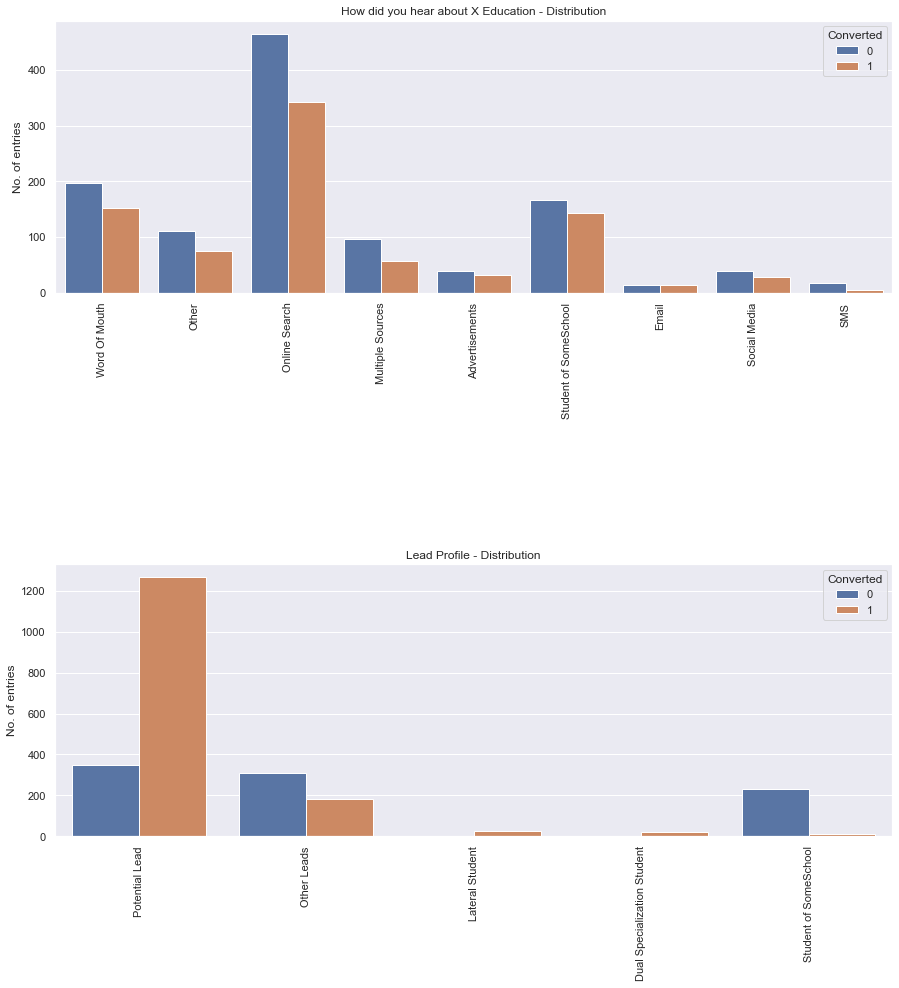

In [15]:
#analyse variables with high % of NULL values
high_null=['How did you hear about X Education','Lead Profile']

sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
for i in range(len(high_null)):
    plt.subplot(2, 1, i+1)
    var1=high_null[i]
    
    sns.countplot(x= var1, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var1+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)


In [16]:
#lack of information from "How did you hear about X Education" column 
leads_df=leads_df.drop('How did you hear about X Education',axis=1)

In [17]:
#asymmetric index and score
print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Activity Score'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())
print(leads_df['Asymmetrique Profile Score'].value_counts())

02.Medium    3839
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
02.Medium    2787
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1758
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


In [18]:
#updating assymmetrique columns values
ai_list = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
leads_df[ai_list] = leads_df[ai_list].apply(lambda x: x.map({'01.High':'High','02.Medium':'Medium','03.Low':'Low'}))

print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())

Medium    3839
High       820
Low        362
Name: Asymmetrique Activity Index, dtype: int64
Medium    2787
High      2203
Low         31
Name: Asymmetrique Profile Index, dtype: int64


In [19]:
#dropping the asymmetrique columns with score values

leads_df=leads_df.drop('Asymmetrique Activity Score',axis=1)
leads_df=leads_df.drop('Asymmetrique Profile Score',axis=1)

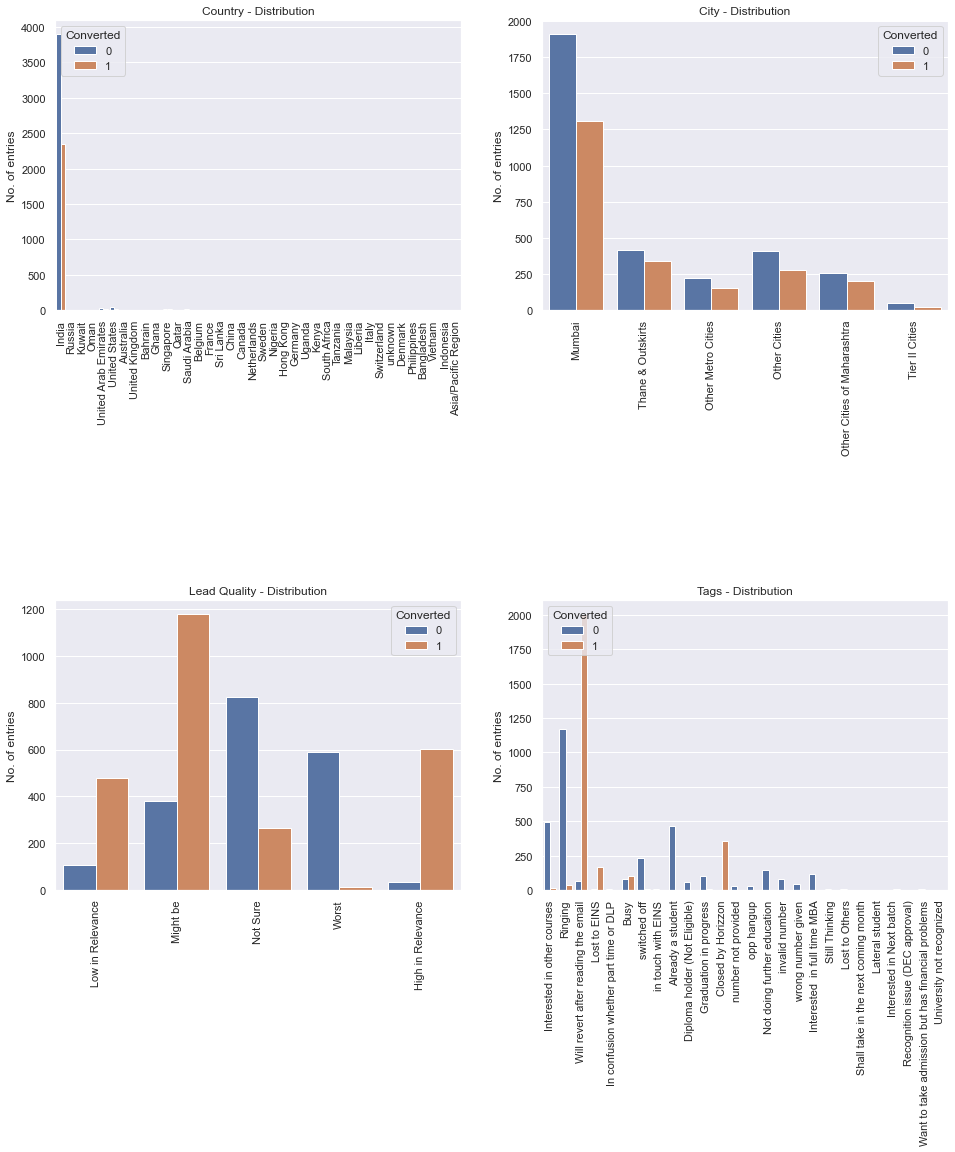

In [20]:
col_list1=['Country','City','Lead Quality','Tags']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list1)):
    plt.subplot(2, 2, i+1)
    var2=col_list1[i]
    sns.countplot(x= var2, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var2+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

In [21]:
#location doesn't have a major impact on conversion rate
leads_df=leads_df.drop('Country',axis=1)
leads_df=leads_df.drop('City',axis=1)

In [22]:
#column wise null %
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


#description of numerical field that are NULL

In [23]:
leads_df[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,8441.000000,8441.000000
mean,3.603720,2.475223
std,4.954932,2.156764
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.500000
max,251.000000,55.000000


In [24]:
leads_df.loc[leads_df['TotalVisits'] == 3]['Page Views Per Visit'].describe()

count    1248.000000
mean        2.654247
std         0.648270
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Page Views Per Visit, dtype: float64

In [25]:
#null values imputation
leads_df['TotalVisits'].fillna((leads_df['TotalVisits'].median()), inplace=True)
leads_df['Page Views Per Visit'].replace(np.NaN,2.65,inplace=True)

In [26]:
#check other null values
null_v=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(null_v[null_v > 0])

Lead Source                                       0.41
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


In [27]:
#mode imputation for'lead scource' and 'last activity'
leads_df['Lead Source'].fillna((leads_df['Lead Source'].mode()[0]), inplace=True)
leads_df['Last Activity'].fillna((leads_df['Last Activity'].mode()[0]), inplace=True)

In [28]:
high_null

['How did you hear about X Education', 'Lead Profile']

In [29]:
#apply np.NaN other SELECT columns 
s_list=['What is your current occupation','What matters most to you in choosing a course']

for x in s_list:
    leads_df[x].replace('Select',np.NaN,inplace=True)

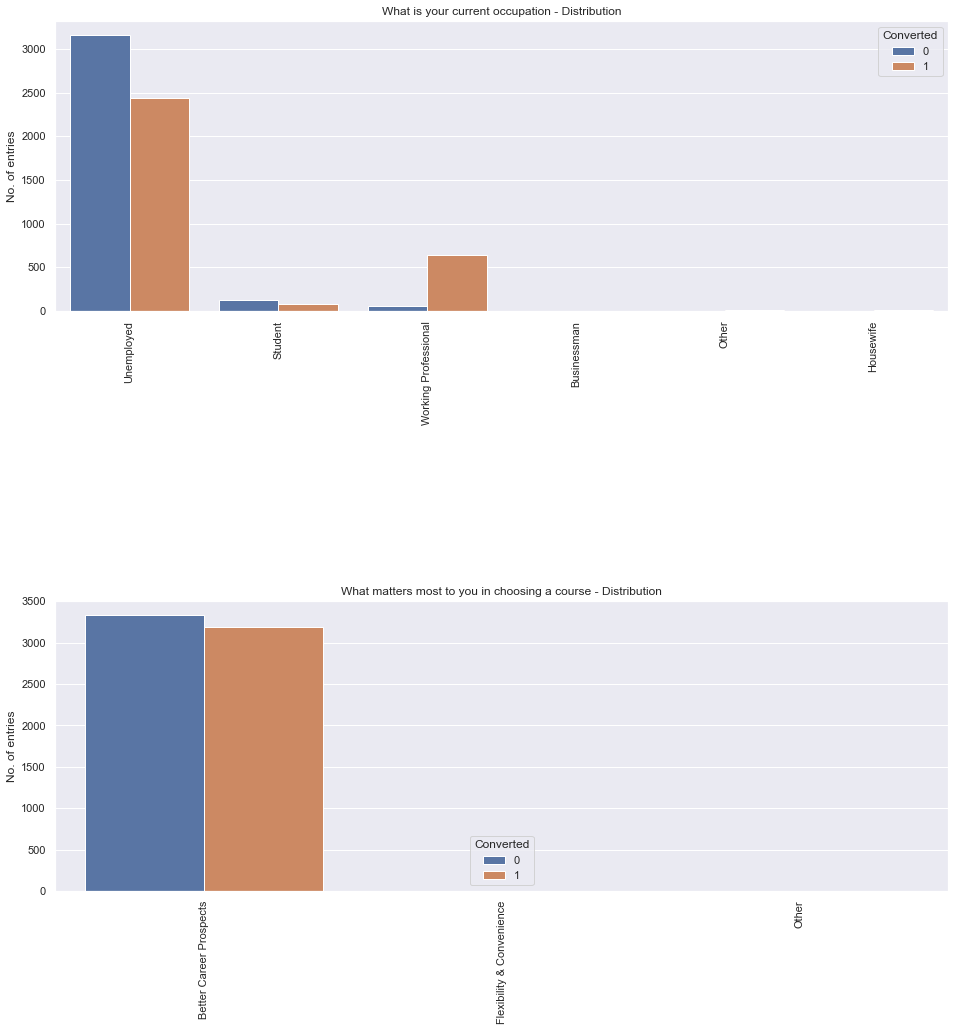

In [30]:
#histogram for 'What is your current occupation'and 'What matters most to you in choosing a course'
plt.figure(figsize=(16,16))
for i in range(len(s_list)):
    plt.subplot(2, 1, i+1)
    var2=s_list[i]
    sns.countplot(x= var2, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var2+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

In [31]:
#'What matters most to you in choosing a course' doesn't provide very varied values
leads_df=leads_df.drop('What matters most to you in choosing a course',axis=1)

In [32]:
leads_df['What is your current occupation'].fillna(('Unknown'), inplace=True)

Text(0.5, 0, '')

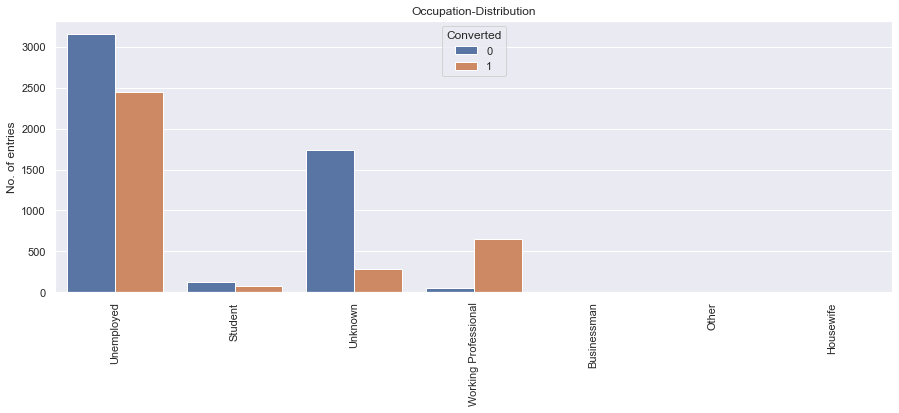

In [33]:
#histogram for occuption-distribution
plt.figure(figsize=(15,5))
sns.countplot(x= 'What is your current occupation', hue = 'Converted', data = leads_df)
plt.xticks(rotation=90)
plt.title('Plotting data for target in terms of total count')
plt.title('Occupation-Distribution')
plt.ylabel('No. of entries')
plt.xticks(rotation=90)
plt.xlabel(None)

visualising and cleaning catogorical variables


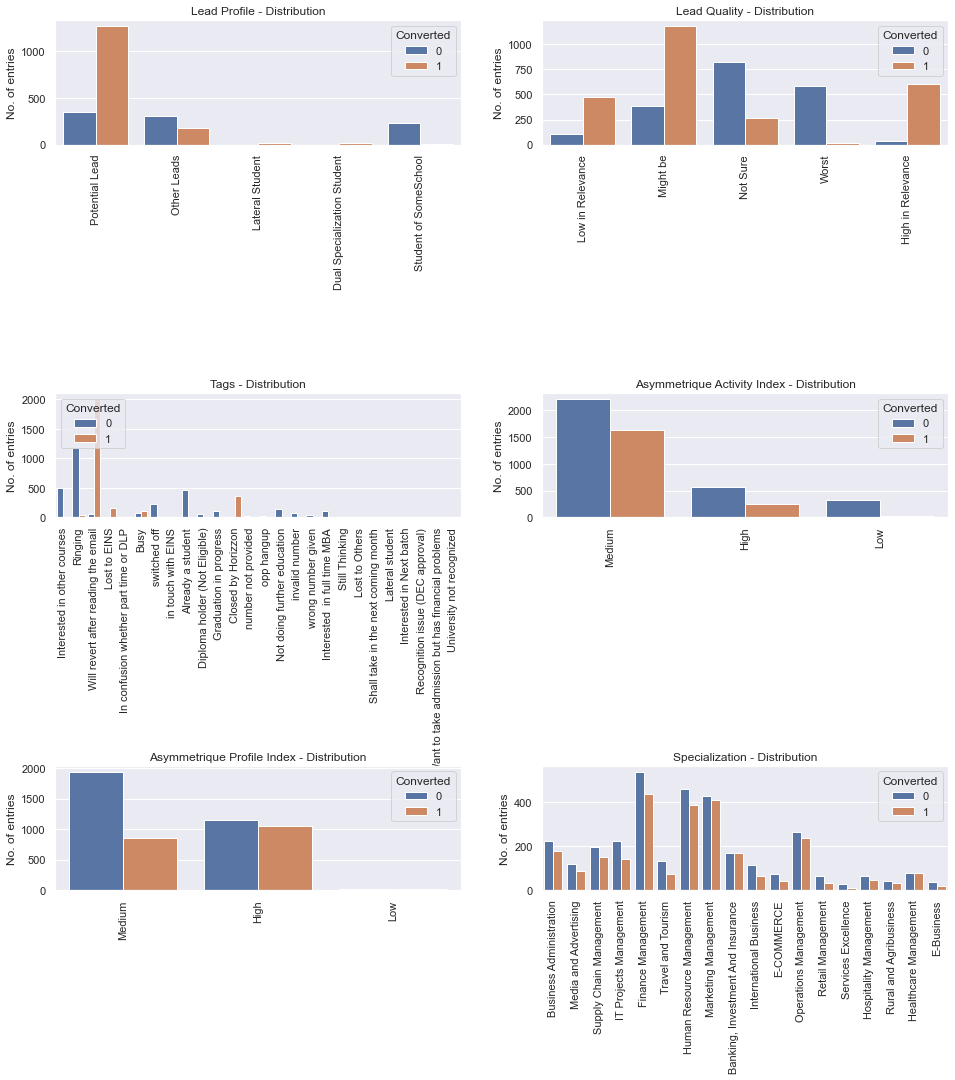

In [34]:
v_list=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of these categorical variables
plt.figure(figsize=(16,16))
for i in range(len(v_list)):
    plt.subplot(3, 2, i+1)
    var3=v_list[i]
    sns.countplot(x= var3, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var3+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2)

In [35]:
#"Tags","Lead Profile","Specialization" and "Lead Quality" impart a large impact on output, therefore impute with 'unknown'
leads_df['Lead Profile'].fillna(('Unknown'), inplace=True)
leads_df['Lead Quality'].fillna(('Unknown'), inplace=True)
leads_df['Specialization'].fillna(('Unknown'), inplace=True)
leads_df['Tags'].fillna(('Unknown'), inplace=True)

In [36]:
#imputing asymmetric profile and activity index fields to rule-out any bias
x_df=pd.DataFrame(leads_df['Asymmetrique Profile Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Profile Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(leads_df.loc[leads_df['Asymmetrique Profile Index'].isnull() == True])
i=0
j=0
for p,row in leads_df.loc[leads_df['Asymmetrique Profile Index'].isnull() == True].iterrows():
    leads_df.at[p,'Asymmetrique Profile Index']=x_df['Asymmetrique Profile Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

In [37]:
x_df=pd.DataFrame(leads_df['Asymmetrique Activity Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Activity Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(leads_df.loc[leads_df['Asymmetrique Activity Index'].isnull() == True])
i=0
j=0
for p,row in leads_df.loc[leads_df['Asymmetrique Activity Index'].isnull() == True].iterrows():
    leads_df.at[p,'Asymmetrique Activity Index']=x_df['Asymmetrique Activity Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

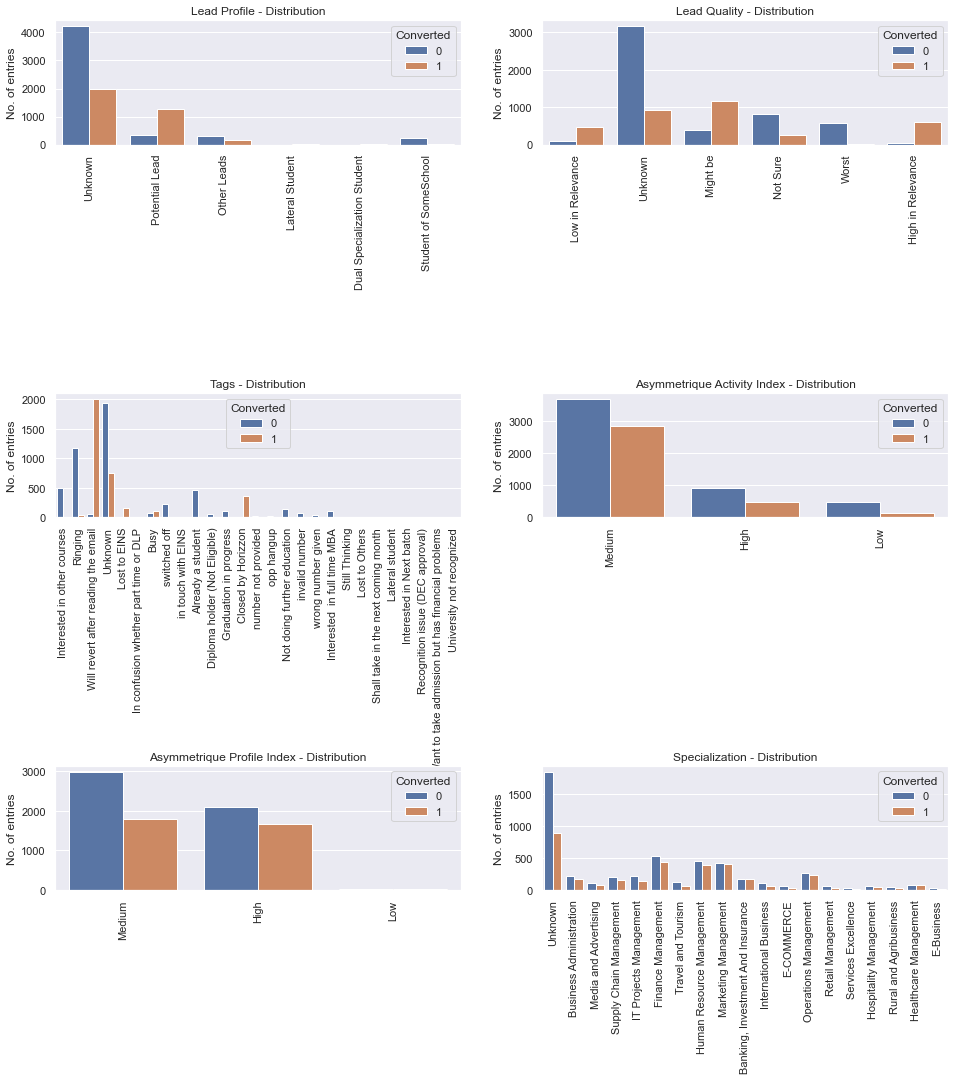

In [38]:
v_list=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(v_list)):
    plt.subplot(3, 2, i+1)
    var3=v_list[i]
    
    sns.countplot(x= var3, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var3+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2)

In [39]:
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Series([], dtype: float64)


In [40]:
leads_df.shape

(8576, 25)

In [41]:
#value distribution in non-null variables
print(leads_df['Do Not Email'].value_counts())
print(leads_df['Do Not Call'].value_counts())
print(leads_df['Search'].value_counts())
print(leads_df['Newspaper Article'].value_counts())
print(leads_df['X Education Forums'].value_counts())
print(leads_df['Newspaper'].value_counts())
print(leads_df['Digital Advertisement'].value_counts())
print(leads_df['Through Recommendations'].value_counts())
print(leads_df['A free copy of Mastering The Interview'].value_counts())

No     7896
Yes     680
Name: Do Not Email, dtype: int64
No     8574
Yes       2
Name: Do Not Call, dtype: int64
No     8562
Yes      14
Name: Search, dtype: int64
No     8574
Yes       2
Name: Newspaper Article, dtype: int64
No     8575
Yes       1
Name: X Education Forums, dtype: int64
No     8575
Yes       1
Name: Newspaper, dtype: int64
No     8572
Yes       4
Name: Digital Advertisement, dtype: int64
No     8569
Yes       7
Name: Through Recommendations, dtype: int64
No     5694
Yes    2882
Name: A free copy of Mastering The Interview, dtype: int64


In [42]:
#dropping max-single-valued columns
leads_df=leads_df.drop('Do Not Call',axis=1)
leads_df=leads_df.drop('Search',axis=1)
leads_df=leads_df.drop('Newspaper Article',axis=1)
leads_df=leads_df.drop('X Education Forums',axis=1)
leads_df=leads_df.drop('Newspaper',axis=1)
leads_df=leads_df.drop('Digital Advertisement',axis=1)
leads_df=leads_df.drop('Through Recommendations',axis=1)

In [43]:
#num-variable analysis
n_var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads_df[n_var].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8576.000000,8576.000000,8576.000000
mean,3.594216,509.471199,2.477975
std,4.916348,552.873572,2.139830
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,268.000000,2.000000
75%,5.000000,972.000000,3.500000
max,251.000000,2272.000000,55.000000


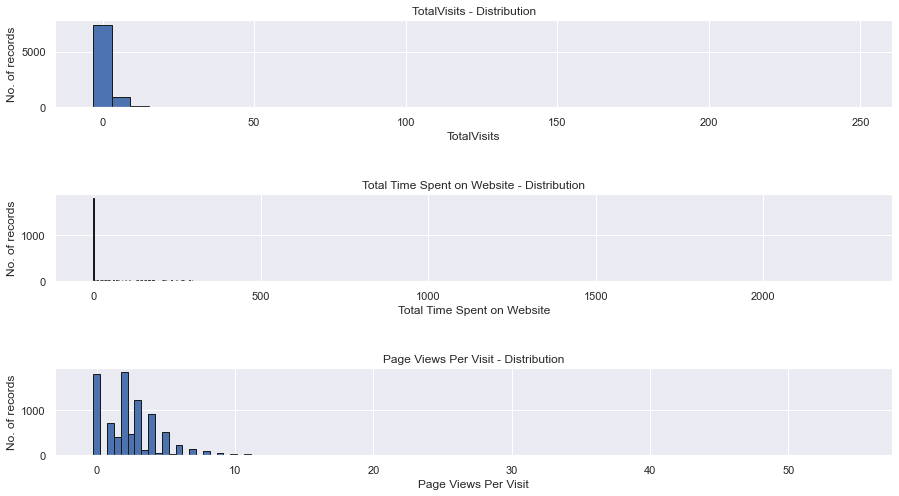

In [44]:
#histogram
plt.figure(figsize=(15,8))
for i in range(len(n_var)):
    plt.subplot(3,1, i+1)
    var4=n_var[i]
    leads_df[var4].plot.hist(edgecolor = 'k',bins=(len(leads_df[var4].unique())), align='left')
    plt.title(var4+' - Distribution')
    plt.xlabel(var4)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)

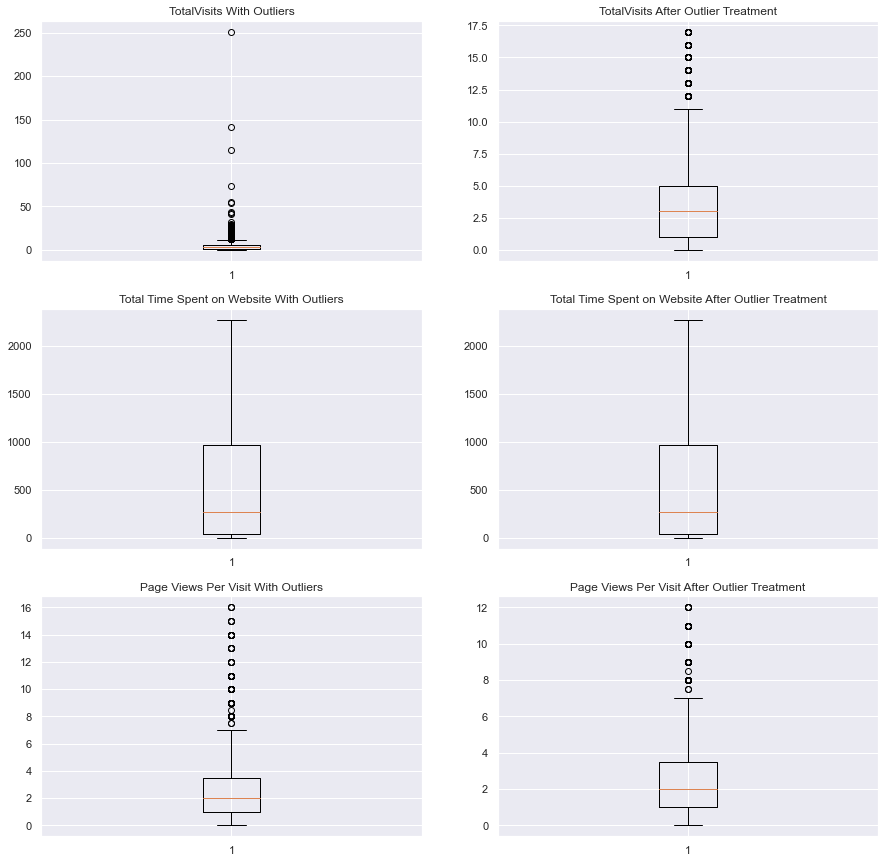

In [45]:
#presence of outliers
plt.figure(figsize=(15,15))
p_col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
p=0
for j in range(len(p_col)):
    var5=p_col[j]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var5+' With Outliers')
    plt.boxplot(leads_df[var5])
    Q1 = leads_df[var5].quantile(0.05)
    Q3 = leads_df[var5].quantile(0.90)
    IQR = Q3 - Q1
    leads_df = leads_df[(leads_df[var5] >= Q1 - 1.5*IQR) & (leads_df[var5] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var5+' After Outlier Treatment')
    plt.boxplot(leads_df[var5])

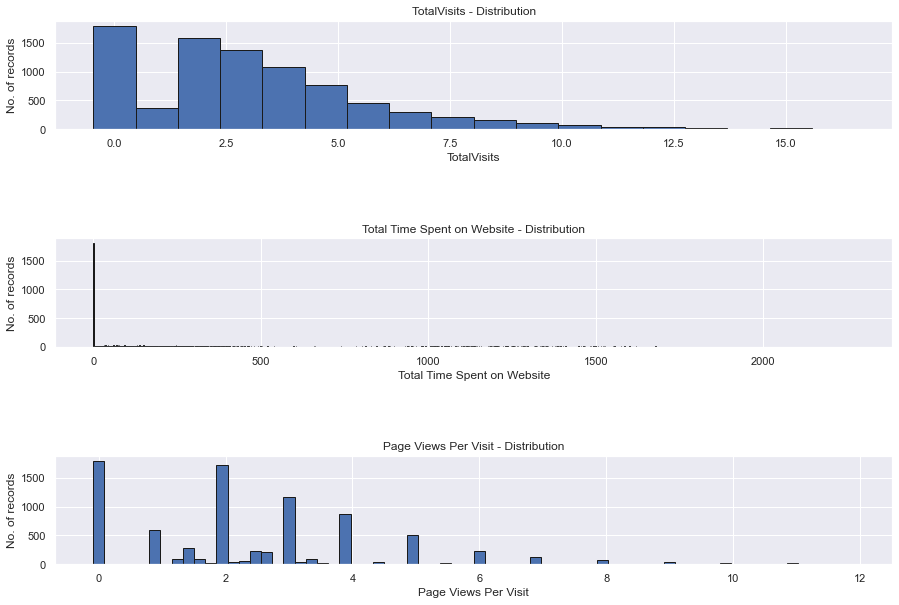

In [46]:
plt.figure(figsize=(15,10))
for i in range(len(n_var)):
    plt.subplot(3,1, i+1)
    var5=n_var[i]
    leads_df[var5].plot.hist(edgecolor = 'k',bins=(len(leads_df[var5].unique())), align='left')
    plt.title(var5+' - Distribution')
    plt.xlabel(var5)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1) 

Text(0, 0.5, 'No. of records')

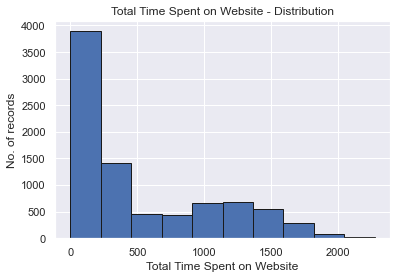

In [47]:
leads_df['Total Time Spent on Website'].plot.hist(edgecolor = 'k')
plt.title('Total Time Spent on Website - Distribution')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('No. of records')

<AxesSubplot:>

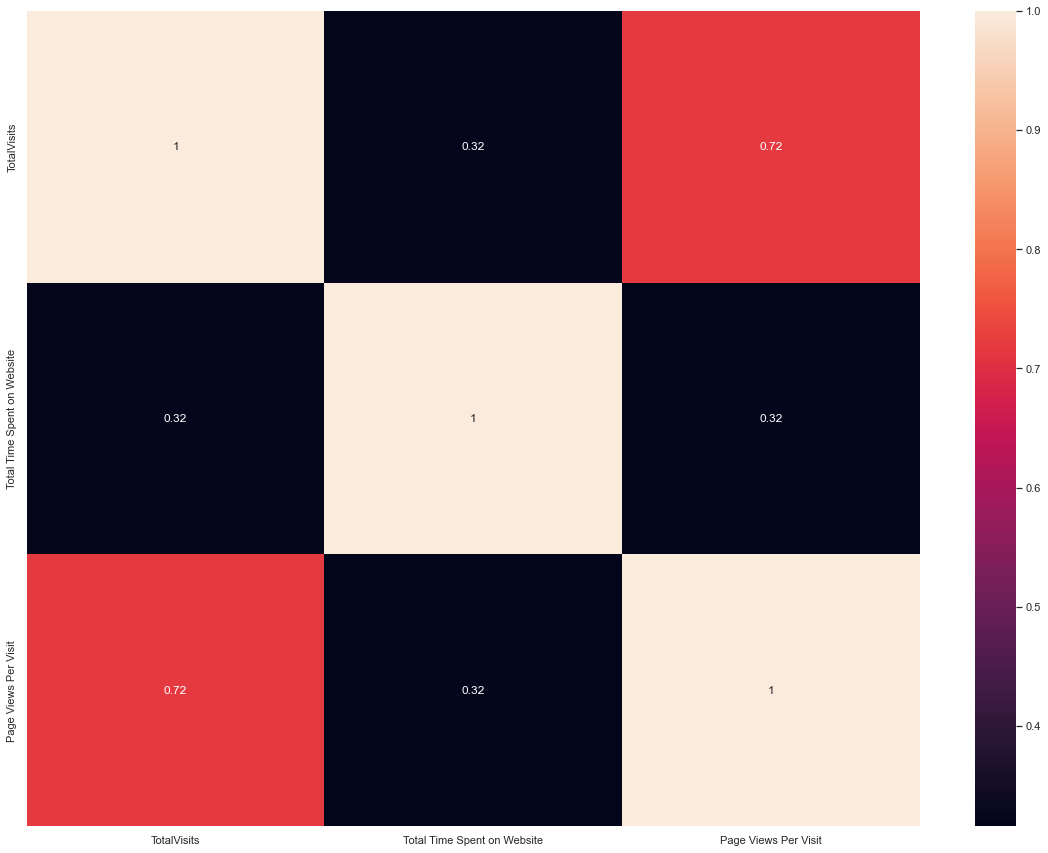

In [100]:
#heat map
plt.figure(figsize=(20,15))
sns.heatmap(leads_df[p_col].corr(), annot=True)

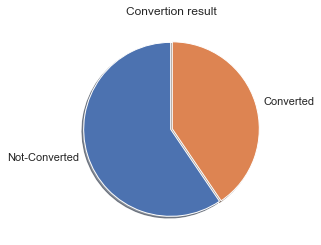

In [103]:
#pie chart for converted rate
explode = (0.01,0.01) 
p_labels = ['Not-Converted', 'Converted']
p_size = leads_df['Converted'].value_counts()/len(leads_df.index) * 100
plt.pie(p_size, labels=p_labels, explode = explode,shadow=True, startangle=90)
plt.title('Convertion result')

plt.show()

In [50]:
leads_df['Converted'].value_counts()

0    5041
1    3433
Name: Converted, dtype: int64

In [51]:
leads_df.shape

(8474, 18)

In [52]:
#variable encoding
print(leads_df['Do Not Email'].value_counts())
print(leads_df['A free copy of Mastering The Interview'].value_counts())

No     7813
Yes     661
Name: Do Not Email, dtype: int64
No     5656
Yes    2818
Name: A free copy of Mastering The Interview, dtype: int64


In [53]:
y_n_list=['Do Not Email','A free copy of Mastering The Interview']

for var6 in y_n_list:
    dummy_df = pd.get_dummies(leads_df[var6],prefix=var6)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    
    #drop 'yes' due to low count 
    leads_df.drop([var6,var6+'_Yes'], axis =1 , inplace=True)

leads_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity,Do Not Email_No,A free copy of Mastering The Interview_No
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Medium,Medium,Modified,1,1
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Unknown,Unknown,Medium,Medium,Email Opened,1,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,Email Opened,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Medium,High,Modified,1,1
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,Medium,High,Modified,1,1


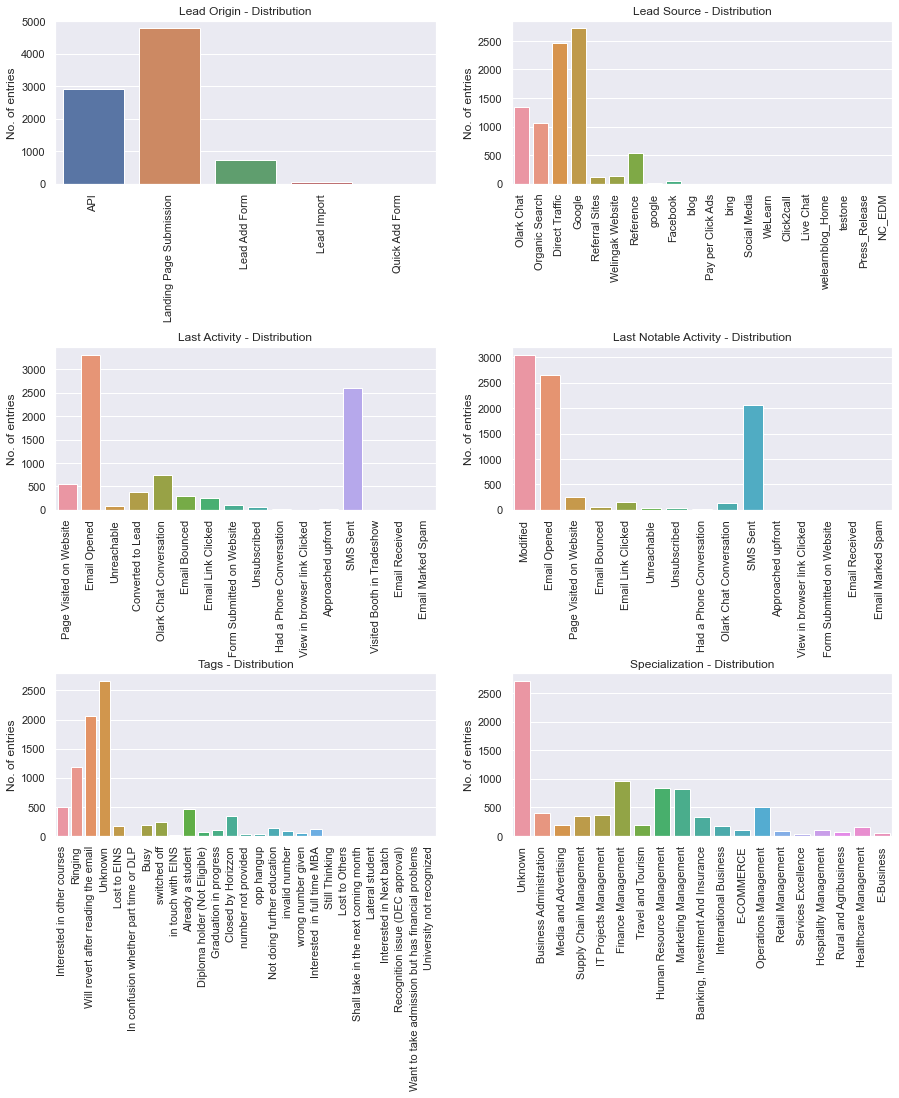

In [54]:
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Tags','Specialization']

# histogram for distribution of categorical variables
plt.figure(figsize=(15,15))
for i in range(len(col_list_categ)):
    plt.subplot(3, 2, i+1)
    var7=col_list_categ[i]
    sns.countplot(x=var7, data=leads_df)
    plt.title(var7+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

In [55]:
print(leads_df['Tags'].value_counts())
print(leads_df['Specialization'].value_counts())

Unknown                                              2666
Will revert after reading the email                  2053
Ringing                                              1182
Interested in other courses                           506
Already a student                                     462
Closed by Horizzon                                    348
switched off                                          237
Busy                                                  185
Lost to EINS                                          169
Not doing further education                           138
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    27
in touch with 

In [56]:
#grouping minor values
for t,row in leads_df.iterrows():
    if leads_df.at[t,'Lead Origin']== 'Quick Add Form':
        leads_df.at[t,'Lead Origin'] = 'Others'
    
    if leads_df.at[t,'Lead Source']== 'google':
        leads_df.at[t,'Lead Source'] = 'Google'
    elif leads_df.at[t,'Lead Source'] in (['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','testone','Press_Release','NC_EDM']):
        leads_df.at[t,'Lead Source'] = 'Others'
    
    if leads_df.at[t,'Last Activity'] in (['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow']):
        leads_df.at[t,'Last Activity'] = 'Others'
    
    if leads_df.at[t,'Last Notable Activity'] in (['Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Email Received','Form Submitted on Website']):
        leads_df.at[t,'Last Notable Activity'] = 'Others'
    
    if leads_df.at[t,'Tags'] in (['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']):
        leads_df.at[t,'Tags'] = 'Others'
        
print(leads_df['Lead Origin'].value_counts())
print(leads_df['Lead Source'].value_counts())
print(leads_df['Last Activity'].value_counts())
print(leads_df['Last Notable Activity'].value_counts())
print(leads_df['Tags'].value_counts())

Landing Page Submission    4775
API                        2927
Lead Add Form               716
Lead Import                  55
Others                        1
Name: Lead Origin, dtype: int64
Google              2724
Direct Traffic      2471
Olark Chat          1345
Organic Search      1066
Reference            533
Welingak Website     142
Referral Sites       119
Facebook              55
Others                19
Name: Lead Source, dtype: int64
Email Opened                 3315
SMS Sent                     2610
Olark Chat Conversation       750
Page Visited on Website       557
Converted to Lead             389
Email Bounced                 301
Email Link Clicked            246
Form Submitted on Website     113
Unreachable                    89
Unsubscribed                   56
Others                         48
Name: Last Activity, dtype: int64
Modified                   3055
Email Opened               2651
SMS Sent                   2063
Page Visited on Website     259
Email Link Clic

In [57]:
#dropping 'others'
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity']

for var8 in col_list_categ:
    dummy_df = pd.get_dummies(leads_df[var8],prefix=var8)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    
    leads_df.drop([var8,var8+'_Others'], axis =1 , inplace=True)

leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,Unknown,Unemployed,Ringing,Unknown,Unknown,...,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,...,1,0,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,...,0,0,0,0,0,1,0,0,0,0


In [58]:
#dropping the 'unknown' and 'others' value
col_list_categ_2=['Specialization','What is your current occupation','Tags','Lead Quality','Lead Profile']

for var9 in col_list_categ_2:
    dummy_df = pd.get_dummies(leads_df[var9],prefix=var9)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    
    leads_df.drop([var9,var9+'_Unknown'], axis =1 , inplace=True)
    if var9 == 'Tags':
        leads_df.drop([var9+'_Others'], axis =1 , inplace=True)
        

leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,...,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.0,Medium,Medium,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,Medium,Medium,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Medium,High,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,660719,0,1.0,305,1.0,Medium,High,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,Medium,High,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
#dummy for both asymmetric index columns
col_list_categ_3=['Asymmetrique Activity Index','Asymmetrique Profile Index']

for var10 in col_list_categ_3:
    dummy_df = pd.get_dummies(leads_df[var10],prefix=var10)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    
    leads_df.drop([var10,var10+'_Low'], axis =1 , inplace=True)

leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,660737,0,0.0,0,0.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,660728,0,5.0,674,2.5,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
3,660719,0,1.0,305,1.0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,660681,1,2.0,1428,1.0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [60]:
leads_df.shape

(8474, 88)

In [61]:
X=leads_df.drop(['Lead Number','Converted'], axis =1)

In [62]:
leads_df.shape

(8474, 88)

In [63]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,0.0,0,0.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,5.0,674,2.5,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2.0,1532,2.0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1,0
3,1.0,305,1.0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,2.0,1428,1.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


Train-test splitting

In [64]:
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [66]:
#scaling
n_var= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[n_var] = scaler.fit_transform(X_train[n_var])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
4278,-0.454824,-0.101516,-0.226094,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
5893,-0.454824,0.038946,-0.226094,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
380,-1.137752,-0.919072,-1.240916,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8976,-0.796288,-0.890260,-0.733505,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4197,-1.137752,-0.919072,-1.240916,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1


# LOGISTIC-REGRESSION MODEL 

In [67]:
log=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5845
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -990.23
Date:                Fri, 24 Mar 2023   Deviance:                       1980.5
Time:                        13:04:47   Pearson chi2:                 9.15e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.5767   1.24e+05      0.000      1.000   -2.43e+05    2.43e+05
TotalVisits                                              0.2432      0.092      2.631      0.009       0.062       0.424
Total Time Spent on Website                              1.0165      0.069     14.806      0.000       0.882       1.151
Page Views Per Visit                                    -0.1808      0.098     -1.852      0.064      -0.372       0.011
Do Not Email_No                                          1.1164      0.355      3.149      0.002       0.421       1.811
A free copy of Mastering The Interview_No               -0.0510      0.196     -0.260      0.795      -0.436       0.334
Lead Origin_API                                        -23.5137   1.24e+05     -0.000      1.000   -2.43e+05    2.43e+05
Lead Origin_Landing Page Submission                    -23.7652   1.24e+05     -0.000      1.000   -2.43e+05    2.43e+05
Lead Origin_Lead Add Form                              -23.1905   1.24e+05     -0.000      1.000   -2.43e+05    2.43e+05
Lead Origin_Lead Import                                -12.6667    6.2e+04     -0.000      1.000   -1.22e+05    1.22e+05
Lead Source_Direct Traffic                              -1.0584      1.538     -0.688      0.491      -4.073       1.956
Lead Source_Facebook                                   -12.6667    6.2e+04     -0.000      1.000   -1.22e+05    1.22e+05
Lead Source_Google                                      -0.7514      1.529     -0.491      0.623      -3.748       2.246
Lead Source_Olark Chat                                   0.1308      1.541      0.085      0.932      -2.890       3.152
Lead Source_Organic Search                              -1.0972      1.541     -0.712      0.477      -4.118       1.923
Lead Source_Reference                                   -1.0950      1.719     -0.637      0.524      -4.463       2.273
Lead Source_Referral Sites                              -1.3336      1.611     -0.828      0.408      -4.492       1.825
Lead Source_Welingak Website                             3.6480      1.961      1.861      0.063      -0.195       7.491
Last Activity_Converted to Lead                         -0.0246      1.014     -0.024      0.981      -2.011       1.962
Last Activity_Email Bounced                              0.3990      1.136      0.351      0.725      -1.827       2.625
Last Activity_Email Link Clicked                         0.7707      1.197      0.644      0.520      -1.575       3.116
Last Activity_Email Opened                               0.7036      0.963      0.730      0.465      -1.184       2.591
Last Activity_Form Submitted on Website                  0

In [68]:
#feature elimination using RFE
log_reg=LogisticRegression()
rfe=RFE(log_reg,15)
rfe=rfe.fit(X_train,y_train)

In [69]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False])

In [70]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 46),
 ('Total Time Spent on Website', False, 11),
 ('Page Views Per Visit', False, 47),
 ('Do Not Email_No', False, 6),
 ('A free copy of Mastering The Interview_No', False, 72),
 ('Lead Origin_API', False, 57),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', False, 9),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Direct Traffic', False, 37),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 56),
 ('Last Activity_Email Link Clicked', False, 65),
 ('Last Activity_Email Opened', False, 52),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', False, 21),

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Worst'],
      dtype='object')

In [72]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email_No', 'A free copy of Mastering The Interview_No',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email

In [73]:
#building LR model using columns selected by RFE
X_train_sm = sm.add_constant(X_train[col])
log1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.9
Date:                Fri, 24 Mar 2023   Deviance:                       2909.8
Time:                        13:04:52   Pearson chi2:                 6.54e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9022      0.079    -24.084      0.000      -2.057      -1.747
Lead Source_Welingak Website                             4.2635      1.009      4.224      0.000       2.285       6.242
What is your current occupation_Unemployed               1.9606      0.106     18.471      0.000       1.753       2.169
What is your current occupation_Working Professional     2.0630      0.315      6.550      0.000       1.446       2.680
Tags_Already a student                                  -4.1670      0.717     -5.813      0.000      -5.572      -2.762
Tags_Closed by Horizzon                                  5.5932      1.014      5.516      0.000       3.606       7.581
Tags_Diploma holder (Not Eligible)                      -3.5105      1.018     -3.448      0.001      -5.506      -1.515
Tags_Interested  in full time MBA                       -2.9783      0.597     -4.986      0.000      -4.149      -1.808
Tags_Interested in other courses                        -3.1432      0.304    -10.340      0.000      -3.739      -2.547
Tags_Lost to EINS                                        4.3120      0.536      8.046      0.000       3.262       5.362
Tags_Not doing further education                        -3.7690      1.015     -3.715      0.000      -5.758      -1.780
Tags_Ringing                                            -3.4406      0.209    -16.447      0.000      -3.851      -3.031
Tags_Will revert after reading the email                 3.5246      0.173     20.322      0.000       3.185       3.865
Tags_invalid number                                    -24.3615   1.65e+04     -0.001      0.999   -3.24e+04    3.24e+04
Tags_switched off                                       -4.0379      0.587     -6.874      0.000      -5.189      -2.887
Lead Quality_Worst                                      -3.4557      0.748     -4.621      0.000      -4.921      -1.990
========================================================================================================================
"""

In [74]:
#multicollinearity check
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.26
9,Tags_Not doing further education,1.22
13,Tags_switched off,1.18
6,Tags_Interested in full time MBA,1.11
0,Lead Source_Welingak Website,1.08
5,Tags_Diploma holder (Not Eligible),1.07
12,Tags_invalid number,1.07
8,Tags_Lost to EINS,1.06
2,What is your current occupation_Working Profes...,0.86
14,Lead Quality_Worst,0.67


In [75]:
#dropping higher p-value insignificant columns
col=col.drop('Tags_invalid number',1)

col

Index(['Lead Source_Welingak Website',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst'],
      dtype='object')

In [76]:
X_train_sm = sm.add_constant(X_train[col])
log2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=log2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1488.3
Date:                Fri, 24 Mar 2023   Deviance:                       2976.6
Time:                        13:04:52   Pearson chi2:                 6.60e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9079      0.079    -24.092      0.000      -2.063      -1.753
Lead Source_Welingak Website                             4.3909      1.009      4.351      0.000       2.413       6.369
What is your current occupation_Unemployed               1.8385      0.105     17.524      0.000       1.633       2.044
What is your current occupation_Working Professional     1.9865      0.315      6.297      0.000       1.368       2.605
Tags_Already a student                                  -4.0378      0.717     -5.635      0.000      -5.442      -2.633
Tags_Closed by Horizzon                                  5.7010      1.015      5.618      0.000       3.712       7.690
Tags_Diploma holder (Not Eligible)                      -3.3832      1.018     -3.323      0.001      -5.379      -1.388
Tags_Interested  in full time MBA                       -2.8539      0.597     -4.780      0.000      -4.024      -1.684
Tags_Interested in other courses                        -3.0180      0.303     -9.946      0.000      -3.613      -2.423
Tags_Lost to EINS                                        4.3704      0.538      8.127      0.000       3.316       5.424
Tags_Not doing further education                        -3.6396      1.014     -3.588      0.000      -5.628      -1.651
Tags_Ringing                                            -3.3131      0.208    -15.898      0.000      -3.722      -2.905
Tags_Will revert after reading the email                 3.6220      0.172     21.000      0.000       3.284       3.960
Tags_switched off                                       -3.9105      0.587     -6.661      0.000      -5.061      -2.760
Lead Quality_Worst                                      -3.5416      0.721     -4.909      0.000      -4.956      -2.128
========================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.25
9,Tags_Not doing further education,1.21
12,Tags_switched off,1.17
6,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.07
5,Tags_Diploma holder (Not Eligible),1.06
8,Tags_Lost to EINS,1.06
2,What is your current occupation_Working Profes...,0.84
13,Lead Quality_Worst,0.66
7,Tags_Interested in other courses,0.38


In [78]:
#prediction for training dataset
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [79]:
y_train_pred[:10]

array([9.72149079e-01, 3.28470716e-02, 1.29219395e-01, 1.83443286e-02,
       9.72149079e-01, 4.36281679e-02, 1.29219395e-01, 9.75889460e-01,
       4.76410694e-04, 5.19655356e-01])

In [80]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index
0,1,0.972149,4278
1,0,0.032847,5893
2,0,0.129219,380
3,0,0.018344,8976
4,1,0.972149,4197


In [81]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Conversion_Prob%'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%
0,1,0.972149,4278,1,97.21
1,0,0.032847,5893,0,3.28
2,0,0.129219,380,0,12.92
3,0,0.018344,8976,0,1.83
4,1,0.972149,4197,1,97.21


In [82]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3446   59]
 [ 586 1840]]


In [83]:
#accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8912493677288822


In [84]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [85]:
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

print("Accuracy score:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

Sensitivity: 75.85 %
Specificity: 98.32 %
Accuracy score: 89.12 %


In [86]:
#implementing model on 'test' dataset
X_test[n_var] = scaler.transform(X_test[n_var])
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst
7813,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7256,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6531,0,1,0,0,0,0,0,0,0,0,0,0,0,0
314,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9094,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
X_test_sm = sm.add_constant(X_test)

In [88]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7813    0.030692
7256    0.043628
6531    0.482658
314     0.129219
9094    0.482658
1284    0.043628
3842    0.032847
1611    0.482658
8592    0.986894
493     0.972149
dtype: float64

In [89]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7813,0.030692
7256,0.043628
6531,0.482658
314,0.129219
9094,0.482658


In [90]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Index'] = y_test_df.index


In [91]:
#append dataframes
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Index,0
0,0,7813,0.030692
1,0,7256,0.043628
2,0,6531,0.482658
3,0,314,0.129219
4,1,9094,0.482658


In [92]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Pred'})

In [93]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Pred.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Conversion_Pred%'] = y_pred_final.Converted_Pred.map(lambda x: round(x*100,2))

# Let's see the head
y_pred_final.head()

,Converted,Index,Converted_Pred,final_predicted,Conversion_Pred%
0,0,7813,0.030692,0,3.07
1,0,7256,0.043628,0,4.36
2,0,6531,0.482658,1,48.27
3,0,314,0.129219,0,12.92
4,1,9094,0.482658,1,48.27


In [94]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.892253244199764

Confusion matrix

In [95]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1347,  189],
       [  85,  922]], dtype=int64)

In [96]:
TP_test = confusion_test[1,1] 
TN_test = confusion_test[0,0]
FP_test = confusion_test[0,1] 
FN_test = confusion_test[1,0] 

In [97]:
print("Sensitivity for the test predictions:",round(100*(TP_test/float(FN_test+TP_test)),2),"%")
print("Specificity for the test predictions:",round(100*(TN_test/float(TN_test+FP_test)),2),"%")
print("Accuracy score for the test predictions:",round(100*((TP_test+TN_test)/(TP_test+TN_test+FP_test+FN_test)),2),"%")

Sensitivity for the test predictions: 91.56 %
Specificity for the test predictions: 87.7 %
Accuracy score for the test predictions: 89.23 %
